# How to Fine Tune a Hugging Faces Transformers Model for NLP Classification

In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# from transformers import BertTokenizer, TFBertForSequenceClassification
# from transformers import DataCollatorWithPadding
# from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

from sklearn import metrics

from tensorflow.keras.optimizers.schedules import PolynomialDecay

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Importing

In [ ]:
ds = load_dataset("ag_news")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

In [ ]:
import random


In [ ]:
label_dict = {0: 'World', 1: 'Sports', 2:'Business', 3:'Sci/Tech',  }

In [ ]:
df_tr = pd.DataFrame(ds['train'])

In [ ]:
df_tr

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


In [ ]:
candidate_labels = ['World', 'Sports', 'Business', 'Sci/Tech']

In [ ]:
classifier = pipeline("zero-shot-classification", model='facebook/bart-large-mnli')


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
df_tr = df_tr.iloc[:300]

In [ ]:
with tf.device('GPU:0'):
  output = classifier(df_tr['text'].tolist(), candidate_labels=candidate_labels)

In [ ]:
pred_labels = [result['labels'][0] for result in output]
pred_labels

['Business',
 'World',
 'World',
 'World',
 'World',
 'World',
 'Business',
 'World',
 'Business',
 'Business',
 'Business',
 'Business',
 'Sci/Tech',
 'World',
 'World',
 'World',
 'World',
 'Business',
 'World',
 'Business',
 'Business',
 'Business',
 'Business',
 'Business',
 'Business',
 'Business',
 'Business',
 'Business',
 'Business',
 'World',
 'Sci/Tech',
 'Business',
 'Business',
 'Business',
 'World',
 'Sci/Tech',
 'Business',
 'Business',
 'Sci/Tech',
 'Business',
 'World',
 'World',
 'Sci/Tech',
 'World',
 'Business',
 'Business',
 'World',
 'Business',
 'World',
 'Business',
 'World',
 'Business',
 'Business',
 'World',
 'Sci/Tech',
 'Business',
 'World',
 'World',
 'World',
 'World',
 'Business',
 'World',
 'World',
 'World',
 'Business',
 'Business',
 'Sci/Tech',
 'Business',
 'Business',
 'Business',
 'Business',
 'World',
 'World',
 'Business',
 'Business',
 'Sci/Tech',
 'Business',
 'Business',
 'Sports',
 'Business',
 'Sci/Tech',
 'Business',
 'Business',
 'World',


In [ ]:
encoded_pred_labels = [list(label_dict.keys())[list(label_dict.values()).index(label)] for label in pred_labels]
encoded_pred_labels

[2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 3,
 2,
 2,
 2,
 0,
 3,
 2,
 2,
 3,
 2,
 0,
 0,
 3,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 3,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 0,
 3,
 3,
 2,
 0,
 2,
 3,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 3,
 0,
 1,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 2,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 3,
 0,
 3,
 0,
 0,
 0,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 3,
 3,
 0,
 0,
 3,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 3,
 0,
 2,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 2,
 0,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 3,
 0,
 3,
 2,
 2,
 2,
 3,
 0,
 2,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 3,


In [ ]:
df_tr['pred_labels'] = pred_labels
df_tr['encoded_pred_labels'] = encoded_pred_labels

In [ ]:
cm  = tf.math.confusion_matrix(df_tr['label'], df_tr['encoded_pred_labels'])

<Axes: >

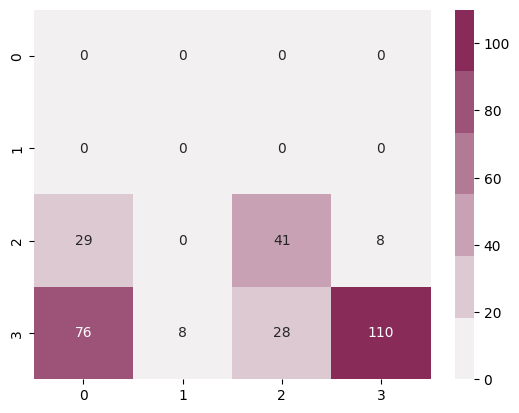

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('#882B58'))

## Fine Tuning

## batch_size, epochs, num_train_steps

In [ ]:
batch_size = 32
epochs = 3

## google/electra-small-discriminator T4GPU

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('google/electra-small-discriminator', num_labels=4)
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### dataloader

In [ ]:
inputs = tokenizer(ds['train']['text'], padding=True, truncation=True, return_tensors='pt')
labels = torch.tensor(ds['train']['label'])

In [ ]:
train_dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

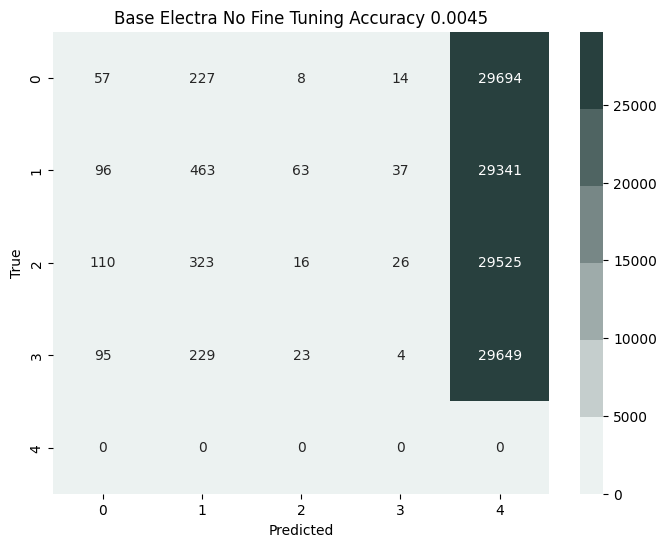

In [ ]:
model.eval()

# Create DataLoader for the training dataset
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

all_labels = []
all_preds = []

# Iterate through the training dataset and make predictions
with torch.no_grad():
    for input_ids, attention_mask, labels in dataloader:
        # Forward pass
        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()
        outputs = model(input_ids, attention_mask=attention_mask)

        # Access the logits
        logits = outputs.logits

        # Get predicted labels
        _, preds = torch.max(logits, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


# Create a confusion matrix
cm = metrics.confusion_matrix(all_labels, all_preds)
acc = metrics.accuracy_score(all_labels, all_preds)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('#28403E'))
plt.title(f'Base Electra No Fine Tuning Accuracy {acc}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_train_steps = len(train_dataloader) * 10
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=5e-5, total_steps=num_train_steps)

In [ ]:
model.train()

for epoch in range(epochs):
    total_loss = 0.0
    for batch_idx, batch in enumerate(train_dataloader):
        inputs_ids, attention_mask, labels = batch

        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

        # Print training progress every 'print_every' batches
        print_every = 10  # Adjust as needed
        if batch_idx % print_every == 0:
            avg_loss = total_loss / (batch_idx + 1)
            print(f"Epoch {epoch + 1}/{epochs}, Batch {batch_idx + 1}/{len(train_dataloader)}, Loss: {avg_loss:.4f}")

# You may want to add additional validation or evaluation steps here


Epoch 1/5, Batch 1/3750, Loss: 1.6258
Epoch 1/5, Batch 11/3750, Loss: 1.6211
Epoch 1/5, Batch 21/3750, Loss: 1.6200
Epoch 1/5, Batch 31/3750, Loss: 1.6179
Epoch 1/5, Batch 41/3750, Loss: 1.6157
Epoch 1/5, Batch 51/3750, Loss: 1.6133
Epoch 1/5, Batch 61/3750, Loss: 1.6109
Epoch 1/5, Batch 71/3750, Loss: 1.6092
Epoch 1/5, Batch 81/3750, Loss: 1.6075
Epoch 1/5, Batch 91/3750, Loss: 1.6054
Epoch 1/5, Batch 101/3750, Loss: 1.6037
Epoch 1/5, Batch 111/3750, Loss: 1.6019
Epoch 1/5, Batch 121/3750, Loss: 1.5999
Epoch 1/5, Batch 131/3750, Loss: 1.5983
Epoch 1/5, Batch 141/3750, Loss: 1.5964
Epoch 1/5, Batch 151/3750, Loss: 1.5944
Epoch 1/5, Batch 161/3750, Loss: 1.5928
Epoch 1/5, Batch 171/3750, Loss: 1.5909
Epoch 1/5, Batch 181/3750, Loss: 1.5893
Epoch 1/5, Batch 191/3750, Loss: 1.5877
Epoch 1/5, Batch 201/3750, Loss: 1.5863
Epoch 1/5, Batch 211/3750, Loss: 1.5847
Epoch 1/5, Batch 221/3750, Loss: 1.5830
Epoch 1/5, Batch 231/3750, Loss: 1.5814
Epoch 1/5, Batch 241/3750, Loss: 1.5800
Epoch 1/5, 

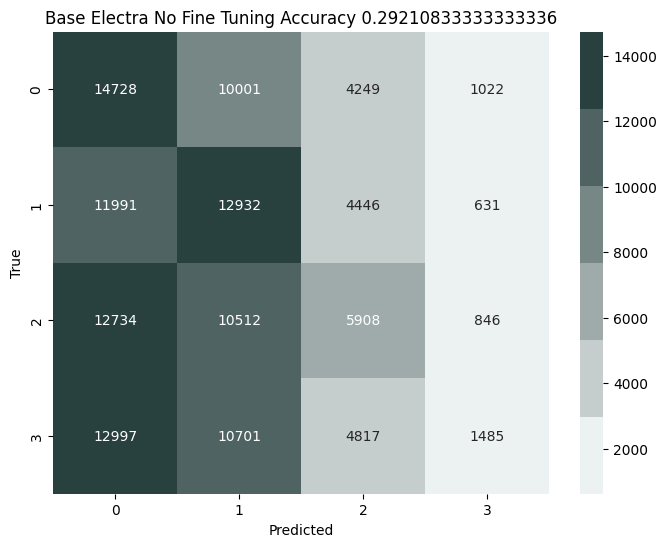

In [ ]:
model.eval()

# Create DataLoader for the training dataset
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

all_labels = []
all_preds = []

# Iterate through the training dataset and make predictions
with torch.no_grad():
    for input_ids, attention_mask, labels in dataloader:
        # Forward pass
        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()
        outputs = model(input_ids, attention_mask=attention_mask)

        # Access the logits
        logits = outputs.logits

        # Get predicted labels
        _, preds = torch.max(logits, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


# Create a confusion matrix
cm = metrics.confusion_matrix(all_labels, all_preds)
acc = metrics.accuracy_score(all_labels, all_preds)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('#28403E'))
plt.title(f'Electra With Fine Tuning Accuracy {acc}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## distilbert-base-uncased T4GPU

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=4)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
inputs = tokenizer(ds['train']['text'], padding=True, truncation=True, return_tensors='pt')
labels = torch.tensor(ds['train']['label'])

In [ ]:
train_dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

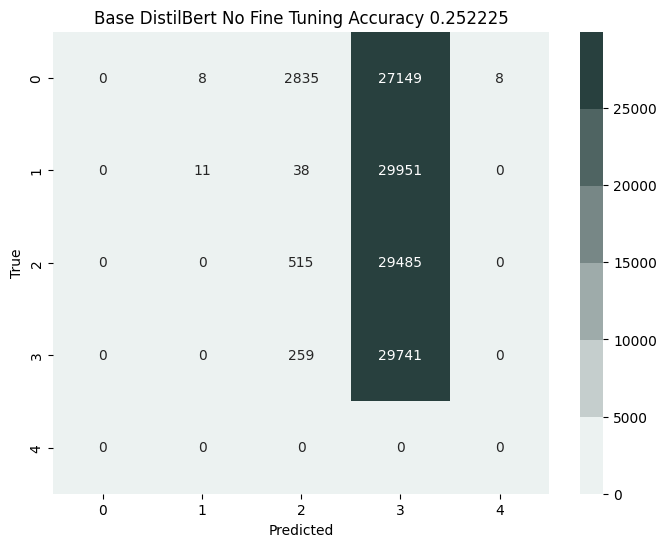

In [ ]:
model.eval()

# Create DataLoader for the training dataset
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

all_labels = []
all_preds = []

# Iterate through the training dataset and make predictions
with torch.no_grad():
    for input_ids, attention_mask, labels in dataloader:
        # Forward pass
        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()
        outputs = model(input_ids, attention_mask=attention_mask)

        # Access the logits
        logits = outputs.logits

        # Get predicted labels
        _, preds = torch.max(logits, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


# Create a confusion matrix
cm = metrics.confusion_matrix(all_labels, all_preds)
acc = metrics.accuracy_score(all_labels, all_preds)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('#28403E'))
plt.title(f'Base DistilBert No Fine Tuning Accuracy {acc}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_train_steps = len(train_dataloader) * 10
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=5e-5, total_steps=num_train_steps)

In [ ]:
model.train()

for epoch in range(epochs):
    total_loss = 0.0
    for batch_idx, batch in enumerate(train_dataloader):
        inputs_ids, attention_mask, labels = batch
        model = model.cuda()
        inputs_ids = inputs_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()
        outputs = model(inputs_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

        # Print training progress every 'print_every' batches
        print_every = 10  # Adjust as needed
        if batch_idx % print_every == 0:
            avg_loss = total_loss / (batch_idx + 1)
            print(f"Epoch {epoch + 1}/{epochs}, Batch {batch_idx + 1}/{len(train_dataloader)}, Loss: {avg_loss:.4f}")

# You may want to add additional validation or evaluation steps here


Epoch 1/3, Batch 1/3750, Loss: 1.2184
Epoch 1/3, Batch 11/3750, Loss: 1.1842
Epoch 1/3, Batch 21/3750, Loss: 1.1542
Epoch 1/3, Batch 31/3750, Loss: 1.1297
Epoch 1/3, Batch 41/3750, Loss: 1.1030
Epoch 1/3, Batch 51/3750, Loss: 1.0806
Epoch 1/3, Batch 61/3750, Loss: 1.0590
Epoch 1/3, Batch 71/3750, Loss: 1.0362
Epoch 1/3, Batch 81/3750, Loss: 1.0145
Epoch 1/3, Batch 91/3750, Loss: 0.9965
Epoch 1/3, Batch 101/3750, Loss: 0.9744
Epoch 1/3, Batch 111/3750, Loss: 0.9519
Epoch 1/3, Batch 121/3750, Loss: 0.9340
Epoch 1/3, Batch 131/3750, Loss: 0.9153
Epoch 1/3, Batch 141/3750, Loss: 0.8963
Epoch 1/3, Batch 151/3750, Loss: 0.8787
Epoch 1/3, Batch 161/3750, Loss: 0.8605
Epoch 1/3, Batch 171/3750, Loss: 0.8460
Epoch 1/3, Batch 181/3750, Loss: 0.8323
Epoch 1/3, Batch 191/3750, Loss: 0.8174
Epoch 1/3, Batch 201/3750, Loss: 0.8025
Epoch 1/3, Batch 211/3750, Loss: 0.7895
Epoch 1/3, Batch 221/3750, Loss: 0.7785
Epoch 1/3, Batch 231/3750, Loss: 0.7684
Epoch 1/3, Batch 241/3750, Loss: 0.7571
Epoch 1/3, 

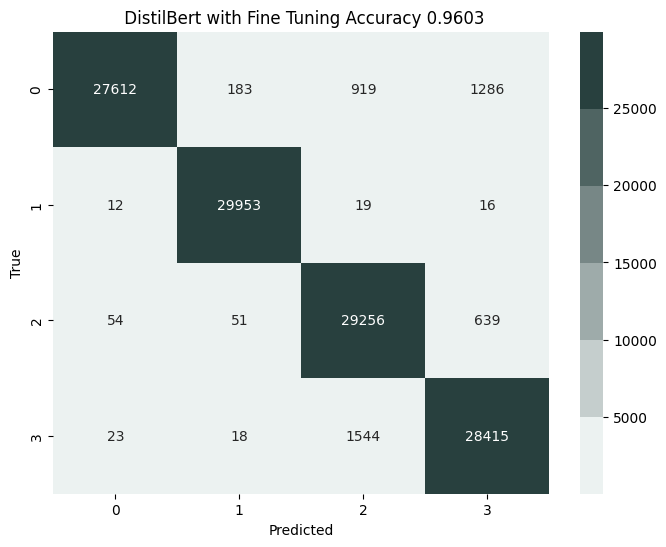

In [ ]:
model.eval()

# Create DataLoader for the training dataset
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

all_labels = []
all_preds = []

# Iterate through the training dataset and make predictions
with torch.no_grad():
    for input_ids, attention_mask, labels in dataloader:
        # Forward pass
        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()
        outputs = model(input_ids, attention_mask=attention_mask)

        # Access the logits
        logits = outputs.logits

        # Get predicted labels
        _, preds = torch.max(logits, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


# Create a confusion matrix
cm = metrics.confusion_matrix(all_labels, all_preds)
acc = metrics.accuracy_score(all_labels, all_preds)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('#28403E'))
plt.title(f' DistilBert with Fine Tuning Accuracy {acc}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## roberta-base T4GPU

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=4)
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
inputs = tokenizer(ds['train']['text'], padding=True, truncation=True, return_tensors='pt')
labels = torch.tensor(ds['train']['label'])

In [ ]:
train_dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

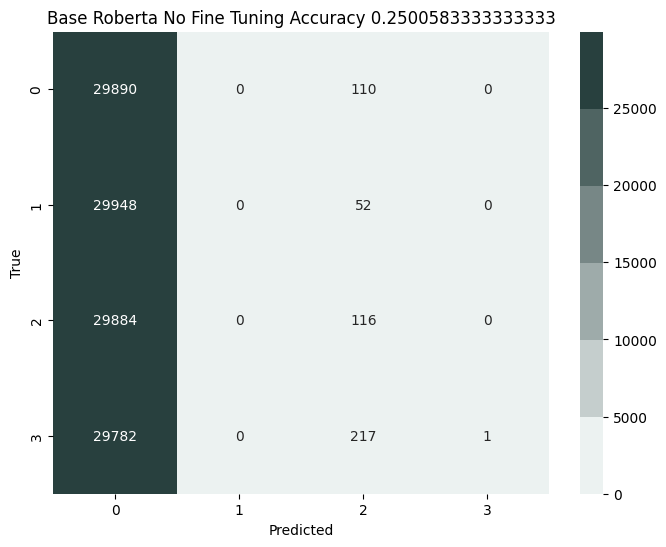

In [ ]:
model.eval()

# Create DataLoader for the training dataset
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

all_labels = []
all_preds = []

# Iterate through the training dataset and make predictions
with torch.no_grad():
    for input_ids, attention_mask, labels in dataloader:
        # Forward pass
        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()
        outputs = model(input_ids, attention_mask=attention_mask)

        # Access the logits
        logits = outputs.logits

        # Get predicted labels
        _, preds = torch.max(logits, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


# Create a confusion matrix
cm = metrics.confusion_matrix(all_labels, all_preds)
acc = metrics.accuracy_score(all_labels, all_preds)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('#28403E'))
plt.title(f'Base Roberta No Fine Tuning Accuracy {acc}')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_train_steps = len(train_dataloader) * epochs
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=5e-5, total_steps=num_train_steps)

In [ ]:
model.train()

for epoch in range(epochs):
    total_loss = 0.0
    for batch_idx, batch in enumerate(train_dataloader):
        input_ids, attention_mask, labels = batch

        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

        # Print training progress every 'print_every' batches
        print_every = 10  # Adjust as needed
        if batch_idx % print_every == 0:
            avg_loss = total_loss / (batch_idx + 1)
            print(f"Epoch {epoch + 1}/{epochs}, Batch {batch_idx + 1}/{len(train_dataloader)}, Loss: {avg_loss:.4f}")

# You may want to add additional validation or evaluation steps here


Epoch 1/3, Batch 1/3750, Loss: 1.3797
Epoch 1/3, Batch 11/3750, Loss: 1.4002
Epoch 1/3, Batch 21/3750, Loss: 1.4013
Epoch 1/3, Batch 31/3750, Loss: 1.3960
Epoch 1/3, Batch 41/3750, Loss: 1.3905
Epoch 1/3, Batch 51/3750, Loss: 1.3873
Epoch 1/3, Batch 61/3750, Loss: 1.3858
Epoch 1/3, Batch 71/3750, Loss: 1.3835
Epoch 1/3, Batch 81/3750, Loss: 1.3799
Epoch 1/3, Batch 91/3750, Loss: 1.3751
Epoch 1/3, Batch 101/3750, Loss: 1.3689
Epoch 1/3, Batch 111/3750, Loss: 1.3614
Epoch 1/3, Batch 121/3750, Loss: 1.3480
Epoch 1/3, Batch 131/3750, Loss: 1.3295
Epoch 1/3, Batch 141/3750, Loss: 1.3053
Epoch 1/3, Batch 151/3750, Loss: 1.2786
Epoch 1/3, Batch 161/3750, Loss: 1.2473
Epoch 1/3, Batch 171/3750, Loss: 1.2144
Epoch 1/3, Batch 181/3750, Loss: 1.1793
Epoch 1/3, Batch 191/3750, Loss: 1.1437
Epoch 1/3, Batch 201/3750, Loss: 1.1088
Epoch 1/3, Batch 211/3750, Loss: 1.0781
Epoch 1/3, Batch 221/3750, Loss: 1.0477
Epoch 1/3, Batch 231/3750, Loss: 1.0183
Epoch 1/3, Batch 241/3750, Loss: 0.9907
Epoch 1/3, 

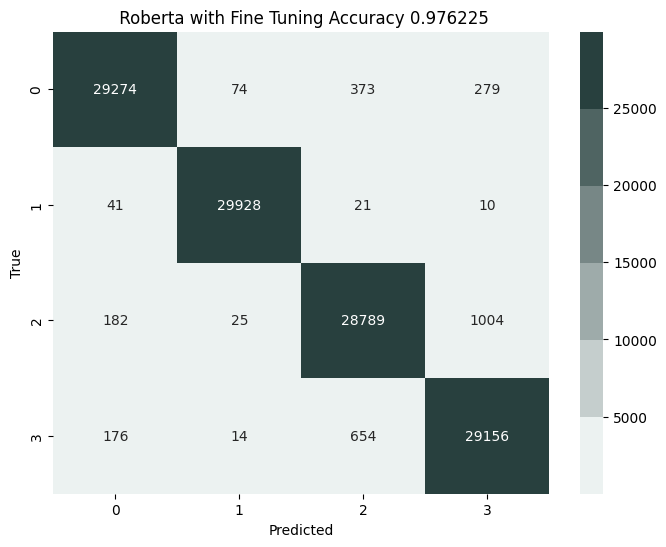

In [ ]:
model.eval()

# Create DataLoader for the training dataset
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

all_labels = []
all_preds = []

# Iterate through the training dataset and make predictions
with torch.no_grad():
    for input_ids, attention_mask, labels in dataloader:
        # Forward pass
        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()
        outputs = model(input_ids, attention_mask=attention_mask)

        # Access the logits
        logits = outputs.logits

        # Get predicted labels
        _, preds = torch.max(logits, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


# Create a confusion matrix
cm = metrics.confusion_matrix(all_labels, all_preds)
acc = metrics.accuracy_score(all_labels, all_preds)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('#28403E'))
plt.title(f' Roberta with Fine Tuning Accuracy {acc}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
del model

In [ ]:
del tokenizer

## albert-base-v2 V100GPU

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('albert-base-v2',
                                                           num_labels=4, ignore_mismatched_sizes=True)
tokenizer = AutoTokenizer.from_pretrained('albert-base-v2')

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

In [ ]:
inputs = tokenizer(ds['train']['text'], padding=True, truncation=True, return_tensors='pt')
labels = torch.tensor(ds['train']['label'])

In [ ]:
train_dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

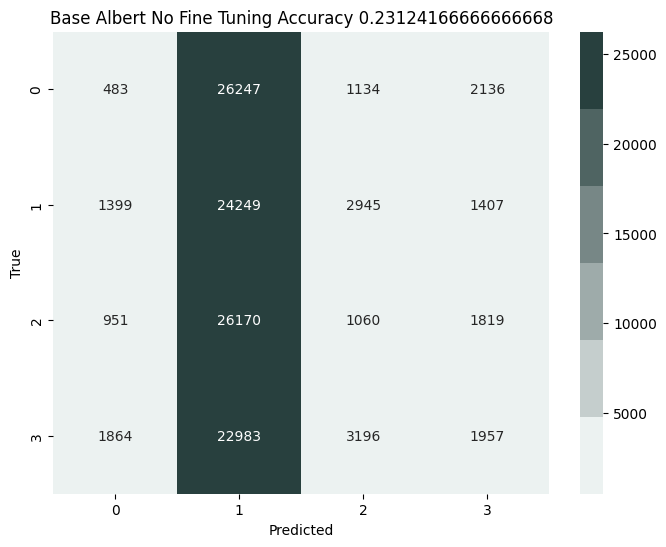

In [ ]:
model.eval()

# Create DataLoader for the training dataset
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

all_labels = []
all_preds = []

# Iterate through the training dataset and make predictions
with torch.no_grad():
    for input_ids, attention_mask, labels in dataloader:
        # Forward pass
        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()

        outputs = model(input_ids, attention_mask=attention_mask)

        # Access the logits
        logits = outputs.logits

        # Get predicted labels
        _, preds = torch.max(logits, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


# Create a confusion matrix
cm = metrics.confusion_matrix(all_labels, all_preds)
acc = metrics.accuracy_score(all_labels, all_preds)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('#28403E'))
plt.title(f'Base Albert No Fine Tuning Accuracy {acc}')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_train_steps = len(train_dataloader) * epochs
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=5e-5, total_steps=num_train_steps)

In [ ]:
model.train()

# with tf.device('GPU:0'):
for epoch in range(epochs):
    total_loss = 0.0
    for batch_idx, batch in enumerate(train_dataloader):
        input_ids, attention_mask, labels = batch

        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

        # Print training progress every 'print_every' batches
        print_every = 10  # Adjust as needed
        if batch_idx % print_every == 0:
            avg_loss = total_loss / (batch_idx + 1)
            print(f"Epoch {epoch + 1}/{epochs}, Batch {batch_idx + 1}/{len(train_dataloader)}, Loss: {avg_loss:.4f}")

# You may want to add additional validation or evaluation steps here


Epoch 1/3, Batch 1/3750, Loss: 1.4838
Epoch 1/3, Batch 11/3750, Loss: 1.4359
Epoch 1/3, Batch 21/3750, Loss: 1.3958
Epoch 1/3, Batch 31/3750, Loss: 1.3615
Epoch 1/3, Batch 41/3750, Loss: 1.3345
Epoch 1/3, Batch 51/3750, Loss: 1.3024
Epoch 1/3, Batch 61/3750, Loss: 1.2733
Epoch 1/3, Batch 71/3750, Loss: 1.2424
Epoch 1/3, Batch 81/3750, Loss: 1.2087
Epoch 1/3, Batch 91/3750, Loss: 1.1766
Epoch 1/3, Batch 101/3750, Loss: 1.1411
Epoch 1/3, Batch 111/3750, Loss: 1.1123
Epoch 1/3, Batch 121/3750, Loss: 1.0795
Epoch 1/3, Batch 131/3750, Loss: 1.0517
Epoch 1/3, Batch 141/3750, Loss: 1.0236
Epoch 1/3, Batch 151/3750, Loss: 0.9990
Epoch 1/3, Batch 161/3750, Loss: 0.9755
Epoch 1/3, Batch 171/3750, Loss: 0.9517
Epoch 1/3, Batch 181/3750, Loss: 0.9320
Epoch 1/3, Batch 191/3750, Loss: 0.9135
Epoch 1/3, Batch 201/3750, Loss: 0.8943
Epoch 1/3, Batch 211/3750, Loss: 0.8760
Epoch 1/3, Batch 221/3750, Loss: 0.8597
Epoch 1/3, Batch 231/3750, Loss: 0.8420
Epoch 1/3, Batch 241/3750, Loss: 0.8288
Epoch 1/3, 

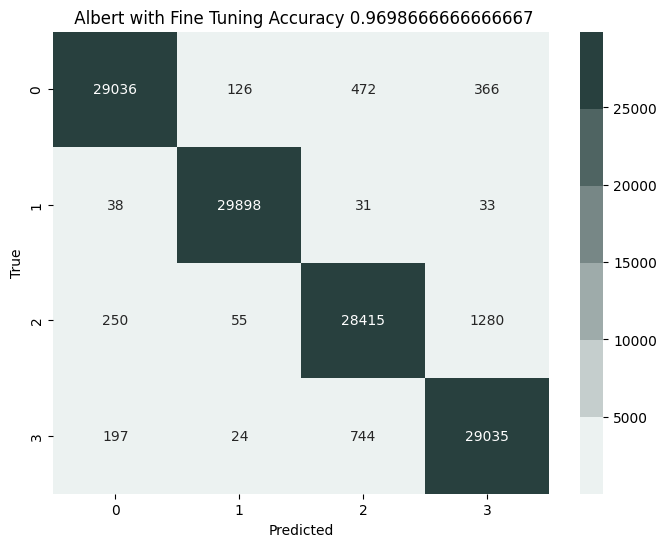

In [ ]:
model.eval()

# Create DataLoader for the training dataset
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

all_labels = []
all_preds = []

# Iterate through the training dataset and make predictions
with torch.no_grad():
    for input_ids, attention_mask, labels in dataloader:
        # Forward pass
        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()

        outputs = model(input_ids, attention_mask=attention_mask)

        # Access the logits
        logits = outputs.logits

        # Get predicted labels
        _, preds = torch.max(logits, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


# Create a confusion matrix
cm = metrics.confusion_matrix(all_labels, all_preds)
acc = metrics.accuracy_score(all_labels, all_preds)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('#28403E'))
plt.title(f' Albert with Fine Tuning Accuracy {acc}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
del model
del tokenizer

## t5-small

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('t5-small',
                                                           num_labels=4, ignore_mismatched_sizes=True)
tokenizer = AutoTokenizer.from_pretrained('t5-small')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at t5-small and are newly initialized: ['classification_head.out_proj.weight', 'classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
inputs = tokenizer(ds['train']['text'], padding=True, truncation=True, return_tensors='pt')
labels = torch.tensor(ds['train']['label'])

In [ ]:
train_dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

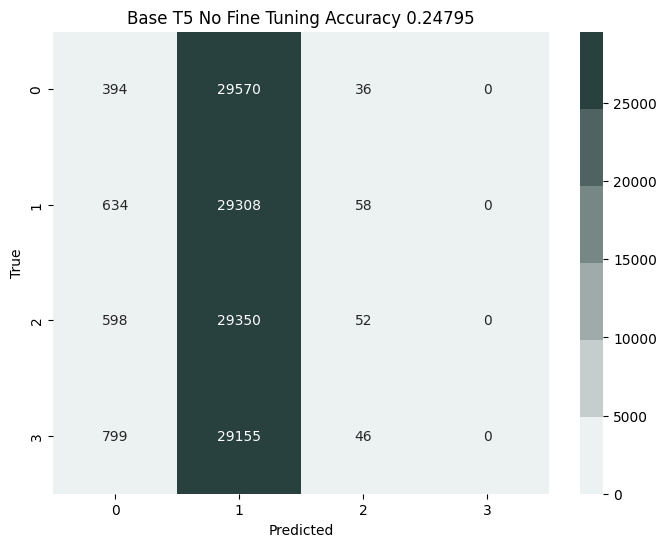

In [ ]:
model.eval()

# Create DataLoader for the training dataset
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

all_labels = []
all_preds = []

# Iterate through the training dataset and make predictions
with torch.no_grad():
    for input_ids, attention_mask, labels in dataloader:
        # Forward pass
        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()

        outputs = model(input_ids, attention_mask=attention_mask)

        # Access the logits
        logits = outputs.logits

        # Get predicted labels
        _, preds = torch.max(logits, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


# Create a confusion matrix
cm = metrics.confusion_matrix(all_labels, all_preds)
acc = metrics.accuracy_score(all_labels, all_preds)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('#28403E'))
plt.title(f'Base T5 No Fine Tuning Accuracy {acc}')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_train_steps = len(train_dataloader) * epochs
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=5e-5, total_steps=num_train_steps)

In [ ]:
model.train()

for epoch in range(epochs):
    total_loss = 0.0
    for batch_idx, batch in enumerate(train_dataloader):
        input_ids, attention_mask, labels = batch

        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

        # Print training progress every 'print_every' batches
        print_every = 10  # Adjust as needed
        if batch_idx % print_every == 0:
            avg_loss = total_loss / (batch_idx + 1)
            print(f"Epoch {epoch + 1}/{epochs}, Batch {batch_idx + 1}/{len(train_dataloader)}, Loss: {avg_loss:.4f}")

# You may want to add additional validation or evaluation steps here


Epoch 1/3, Batch 1/3750, Loss: 1.6688
Epoch 1/3, Batch 11/3750, Loss: 1.5025
Epoch 1/3, Batch 21/3750, Loss: 1.4953
Epoch 1/3, Batch 31/3750, Loss: 1.4924
Epoch 1/3, Batch 41/3750, Loss: 1.5010
Epoch 1/3, Batch 51/3750, Loss: 1.5025
Epoch 1/3, Batch 61/3750, Loss: 1.4991
Epoch 1/3, Batch 71/3750, Loss: 1.4922
Epoch 1/3, Batch 81/3750, Loss: 1.4936
Epoch 1/3, Batch 91/3750, Loss: 1.4885
Epoch 1/3, Batch 101/3750, Loss: 1.4808
Epoch 1/3, Batch 111/3750, Loss: 1.4826
Epoch 1/3, Batch 121/3750, Loss: 1.4822
Epoch 1/3, Batch 131/3750, Loss: 1.4802
Epoch 1/3, Batch 141/3750, Loss: 1.4798
Epoch 1/3, Batch 151/3750, Loss: 1.4789
Epoch 1/3, Batch 161/3750, Loss: 1.4762
Epoch 1/3, Batch 171/3750, Loss: 1.4723
Epoch 1/3, Batch 181/3750, Loss: 1.4708
Epoch 1/3, Batch 191/3750, Loss: 1.4685
Epoch 1/3, Batch 201/3750, Loss: 1.4656
Epoch 1/3, Batch 211/3750, Loss: 1.4619
Epoch 1/3, Batch 221/3750, Loss: 1.4592
Epoch 1/3, Batch 231/3750, Loss: 1.4563
Epoch 1/3, Batch 241/3750, Loss: 1.4548
Epoch 1/3, 

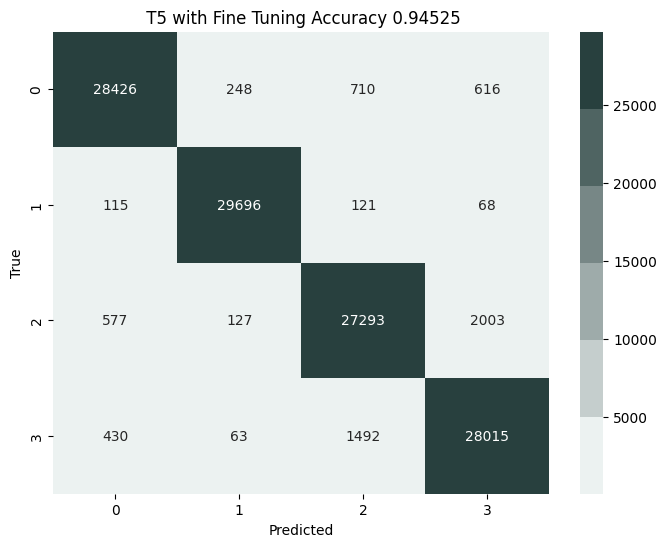

In [ ]:
model.eval()

# Create DataLoader for the training dataset
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

all_labels = []
all_preds = []

# Iterate through the training dataset and make predictions
with torch.no_grad():
    for input_ids, attention_mask, labels in dataloader:
        # Forward pass
        model = model.cuda()
        input_ids = input_ids.cuda()
        attention_mask = attention_mask.cuda()
        labels = labels.cuda()

        outputs = model(input_ids, attention_mask=attention_mask)

        # Access the logits
        logits = outputs.logits

        # Get predicted labels
        _, preds = torch.max(logits, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


# Create a confusion matrix
cm = metrics.confusion_matrix(all_labels, all_preds)
acc = metrics.accuracy_score(all_labels, all_preds)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('#28403E'))
plt.title(f' T5 with Fine Tuning Accuracy {acc}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
del model
del tokenizer

# <font size=6 color=#D1842C>**Summary**

In [ ]:
score_base = [.0045,.252, .25, .2312, .2479]
score_tuned = [.292, .9603, .9762, .9698, .9452]
models = ['electra', 'distilbert', 'roberta', 'albert', 'T5']

dict_scores = {'base':score_base, 'tuned':score_tuned}
df = pd.DataFrame(dict_scores, index=models)
df.sort_values(by='tuned', ascending=False)

,base,tuned
roberta,0.2500,0.9762
albert,0.2312,0.9698
distilbert,0.2520,0.9603
T5,0.2479,0.9452
electra,0.0045,0.2920
